<h1><center>DS300: PE6 - Clustering Exercises</center></h1>

## 1. K-Means Clustering
The `sklearn` function `Kmeans()` performs K-means clustering. We begin with
a simple simulated example, in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25
observations.

Text(0, 0.5, 'X1')

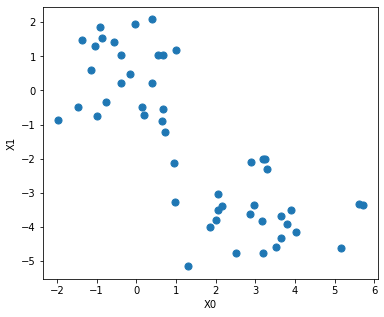

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure everyone has the same results
np.random.seed(101) 

# Data shape is (50, 2), normal distributed
X = np.random.randn(50,2)

# Shift the first half of the data away from 
# the original center (0, 0)
X[0:25, 0] = X[0:25, 0] + 3  # X0 shifts
X[0:25, 1] = X[0:25, 1] - 4  # X1 shifts

# Plot the entire dataset X
f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

We now perform K-means clustering with `K = 2` and random seed 101:

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=101)
kmeans.fit(X)





C:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2, random_state=101)

The cluster assignments of the 50 observations are contained in
`kmeans.labels_`:

In [5]:
print(kmeans.labels_)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0]


The K-means clustering perfectly separated the observations into two clusters
even though we did not supply any group information to `Kmeans()`. We
can plot the data, with each observation colored according to its cluster
assignment:

Text(0, 0.5, 'X1')

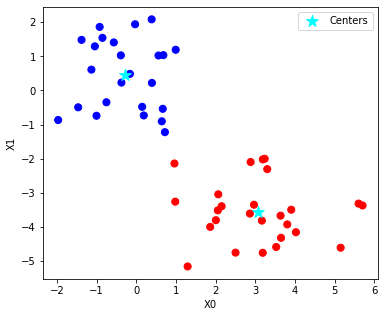

In [7]:
plt.figure(figsize=(6,5))
# Plot the X
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr) 

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], # X0
            kmeans.cluster_centers_[:,1], # X1
            marker = '*', 
            s = 150,
            c = 'cyan', 
            label = 'Centers')

plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

Here the observations can be easily plotted because they are two-dimensional.
If there were more than two variables then we could instead perform PCA
and plot the first two principal components score vectors.

In this example, we knew that there really were two clusters because
we generated the data. However, for real data, in general we do not know
the true number of clusters. We could instead have performed K-means
clustering on this example with `K  =  3`. If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

C:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'X1')

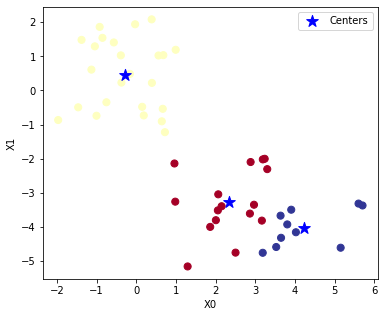

In [9]:
kmeans_3_clusters = KMeans(n_clusters=3, random_state=101)

# Train the model
kmeans_3_clusters.fit(X)


plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.RdYlBu) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:,0], # X0
            kmeans_3_clusters.cluster_centers_[:,1], # X1
            marker='*', 
            s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

To run the `Kmeans()` function in python with multiple initial cluster assignments,
we use the `n_init` argument (default: 10). If a value of `n_init` greater than one
is used, then K-means clustering will be performed using multiple random
assignments, and the `Kmeans()` function will
report only the best results. Here we compare using `n_init = 1`:

In [13]:
km_out_single_run = KMeans(n_init=1, n_clusters=3 ,random_state=101)
km_out_single_run.fit(X)

# Sum of squared error: inertia
km_out_single_run.inertia_

C:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


76.03671662992116

to `n_init = 20`:

In [14]:
km_out_20_run = KMeans(n_init=20, n_clusters=3, random_state=101)
km_out_20_run.fit(X)

km_out_20_run.inertia_

C:\Users\augus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


74.32117757831799

Note that `.inertia_` is the total within-cluster sum of squares,
which we seek to minimize by performing K-means clustering.

It is generally recommended to always run K-means clustering with a large
value of `n_init`, such as 20 or 50 to avoid getting stuck in an undesirable local
optimum.

When performing K-means clustering, in addition to using multiple initial
cluster assignments, it is also important to set a random seed using the
`random_state` parameter. This way, the initial cluster assignments can
be replicated, and the K-means output will be fully reproducible.

## 2. Hierarchical Clustering

### Sklearn's hierarchical clustering model:

Comparing different hierarchical linkage methods on toy datasets with Sklearn.

This example shows characteristics of different linkage methods for hierarchical clustering on datasets that are “interesting” but still in 2D.

The main observations to make are:

+ single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.

+ average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.

+ Ward is the most effective method for noisy data.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

Generate datasets. We choose the size big enough to see the scalability of the algorithms, but not too big to avoid too long running times

In [16]:
n_samples = 1500
# Dataset 1: nested circles
noisy_circles = datasets.make_circles(n_samples=n_samples, 
                                      factor=.5,
                                      noise=.05)

# Dataset 2: 2 half moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# Dataset 3: blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=101)

# Dataset 4: blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=101)
# Dataset 5: a 2D non-structural data
no_structure = np.random.rand(n_samples, 2), None

In [17]:
datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

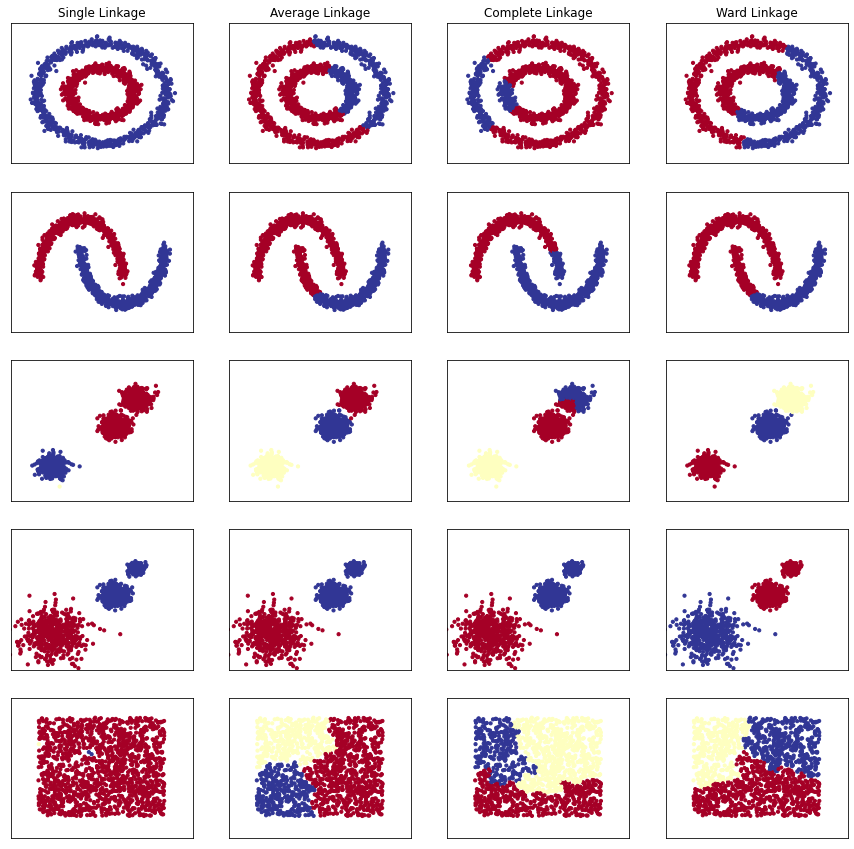

In [18]:
# Set up cluster parameters
plt.figure(figsize=(15, 15))

plot_num = 1 ## For subplot

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = algo_params
    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ======================
    # Create cluster objects
    # ======================
    ward = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)
        y_pred = algorithm.labels_
            
        plt.subplot(5, 4, plot_num)
        if i_dataset == 0:
            plt.title(name)

        plt.scatter(X[:, 0], X[:, 1], s=10, c=algorithm.labels_, cmap=plt.cm.RdYlBu)
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()

### Scipy's `linkage()` function
The `linkage()` function from `scipy` implements several clustering functions in python. In the following example we use the data from the previous section to plot the hierarchical
clustering dendrogram using complete, single, and average linkage clustering,
with Euclidean distance as the dissimilarity measure. We begin by
clustering observations using complete linkage:

In [22]:
from scipy.cluster.hierarchy import linkage

np.random.seed(101)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4


In [24]:
hc_complete = linkage(X, 'complete')

We could just as easily perform hierarchical clustering with average or single linkage instead:

In [25]:
hc_average = linkage(X, 'average')


hc_single = linkage(X, 'single')



We can now plot the dendrograms obtained using the usual `dendrogram()` function.
The numbers at the bottom of the plot identify each observation:

In [26]:
from scipy.cluster.hierarchy import dendrogram


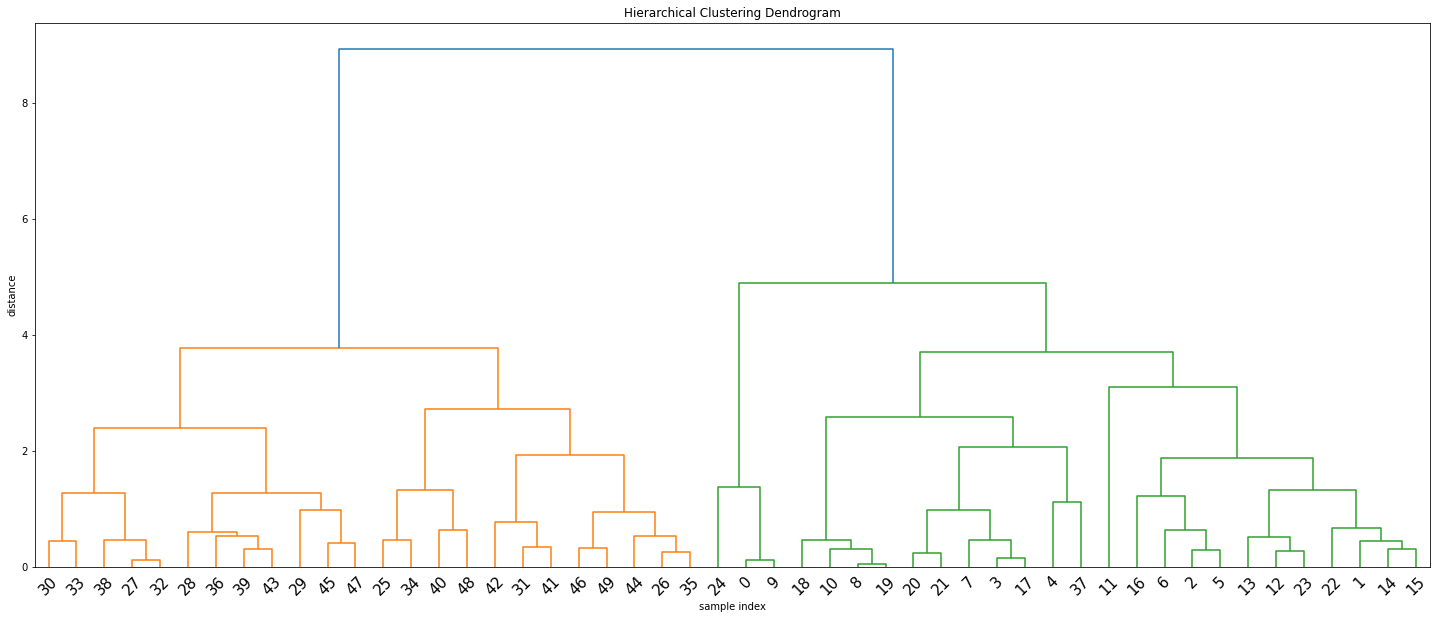

In [37]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    hc_complete,
    leaf_rotation=45.0,
    leaf_font_size=15.0
)
plt.show()

To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the `cut_tree()` function:

In [28]:
from scipy.cluster.hierarchy import cut_tree

In [39]:
print(cut_tree(hc_complete, n_clusters=2).T)



[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 0 1 1 1 1 1 1 1 1 1 1 1 1]]


For this data, complete and average linkage generally separates the observations
into their correct groups.

## 3. DBSCAN

DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is an unsupervised machine learning algorithm.  In comparison to other clustering algorithms, DBSCAN is particularly well suited for problems which require:

+ Minimal domain knowledge to determine the input parameters (i.e. K in k-means and Dmin in hierarchical clustering)
+ Discovery of clusters with arbitrary shapes
+ Good efficiency on large databases

Let's do some exercises.

Firstly, reload the dataset X.

In [67]:
np.random.seed(101)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

Standardize X using StandardScaler.

In [68]:
X = StandardScaler().fit_transform(X)



As is the case in most machine learning algorithms, the model’s behavior is dictated by several parameters. 

+ eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
+ min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.
+ metric: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

As mentioned previously, we must provide a value for epsilon which defines the maximum distance between two points. The following paper, describes an approach for automatically determining the optimal value for Eps: [link](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)

In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

Let's do some study.

In [69]:
# Import the model
from sklearn.neighbors import NearestNeighbors

We can calculate the distance from each point to its closest neighbor using the `NearestNeighbors`. The point itself is included in `n_neighbors`. The `kneighbors()` method returns two arrays, one of which contains the distance to the closest `n_neighbors` points and the other which contains the index for each of those points.

In [70]:
# Create and train a NN model with 2 neighbors. 
nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)




NearestNeighbors(n_neighbors=2)

In [75]:
# Sort the distances
distances, indicies = nn.kneighbors(X)
distances = np.sort(distances, axis=0)

# Show the sorted distances
distances

array([[0.        , 0.02533463],
       [0.        , 0.02533463],
       [0.        , 0.05694114],
       [0.        , 0.05694114],
       [0.        , 0.06230774],
       [0.        , 0.06230774],
       [0.        , 0.07292174],
       [0.        , 0.07292174],
       [0.        , 0.11451246],
       [0.        , 0.11451246],
       [0.        , 0.1158675 ],
       [0.        , 0.1158675 ],
       [0.        , 0.12794625],
       [0.        , 0.12794625],
       [0.        , 0.13634345],
       [0.        , 0.13634345],
       [0.        , 0.14024159],
       [0.        , 0.14387268],
       [0.        , 0.14387268],
       [0.        , 0.14845418],
       [0.        , 0.14845418],
       [0.        , 0.14864541],
       [0.        , 0.14864541],
       [0.        , 0.14882791],
       [0.        , 0.15148626],
       [0.        , 0.15750462],
       [0.        , 0.15757281],
       [0.        , 0.15816784],
       [0.        , 0.15816784],
       [0.        , 0.1598838 ],
       [0.

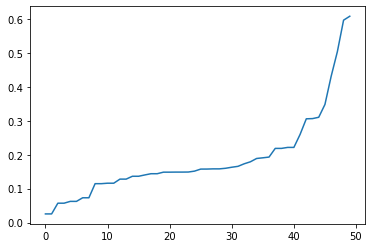

In [76]:
# Plot the distances

distances = distances[:, 1]
plt.plot(distances)

From the diagram, we find the abrupt change occurs at 0.4. Use eps as 0.4 and set min_samples to 5 to build the DBSCAN.

In [53]:
from sklearn.cluster import DBSCAN


In [80]:
db = DBSCAN(eps=0.4, min_samples=5)
db.fit(X)



DBSCAN(eps=0.4)

The `labels_` property contains the list of clusters and their respective points.

In [81]:
clusters = db.labels_


clusters

array([-1,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1,
        0, -1, -1,  0,  0,  0,  0, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

Then, we map every individual cluster to a color. The model classified the densely populated areas. As we can see, all the dark red points were categorized as noise.

Text(0, 0.5, 'X1')

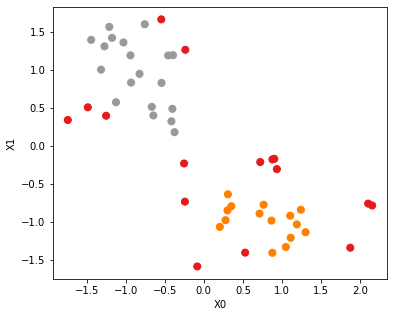

In [82]:
plt.figure(figsize=(6,5))
# Plot the X
plt.scatter(X[:,0], X[:,1], s = 50, c = db.labels_, cmap = plt.cm.Set1) 
plt.xlabel('X0')
plt.ylabel('X1')

## 4. Evaluation

In [83]:
from sklearn import metrics

Calculate the Silhouette coefficient of DBSCAN model.

In [84]:
labels = db.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.28537742697743795

Try another dataset using DBSCAN with default arguments.

In [85]:
# blobs with varied variances
from sklearn import datasets
varied = datasets.make_blobs(n_samples=100,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=101)
X_var, y_var = varied
X_var = StandardScaler().fit_transform(X_var)

Text(0, 0.5, 'X1')

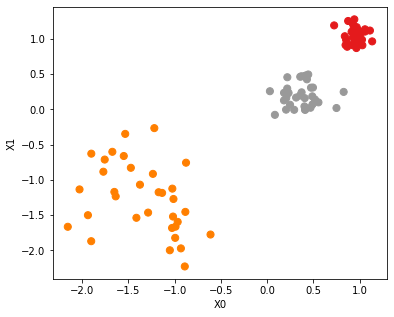

In [86]:
# Create DBSCAN model and train it
db = DBSCAN()
db.fit(X_var)

# Plot the clusters
plt.figure(figsize=(6,5))
# Plot the X
plt.scatter(X_var[:,0], X_var[:,1], s = 50, c = db.labels_, cmap = plt.cm.Set1) 
plt.xlabel('X0')
plt.ylabel('X1')

Find the Silhouette coefficient.

In [88]:
metrics.silhouette_score(X_var, db.labels_, metric='euclidean')



0.7285080302758495

Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance. Perfect labeling is scored 1.0, Bad (e.g. independent labelings) have non-positive scores.

Try adjusted_mutual_info_score

In [90]:
metrics.adjusted_mutual_info_score(y_var, db.labels_)



1.0

homogeneity: each cluster contains only members of a single class.

completeness: all members of a given class are assigned to the same cluster.

Their harmonic mean called V-measure is computed by v_measure_score

Try homogeneity:

In [91]:
metrics.homogeneity_score(y_var, db.labels_)



1.0

Try completeness:

In [92]:
metrics.completeness_score(y_var, db.labels_)

1.0

Try V measure:

In [94]:
metrics.v_measure_score(y_var, db.labels_)





1.0

# Great Job!